<a href="https://colab.research.google.com/github/raguram/eva/blob/master/S8/CIFAR10_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount the drive and load required modules

In [13]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT, force_remount=True)

LIBRARY_ROOT = "/content/drive/My Drive/Colab Notebooks/workspace/cnn-lib/"

from importlib.machinery import SourceFileLoader

SourceFileLoader('Utility', join(LIBRARY_ROOT, 'Utility.py')).load_module()
SourceFileLoader('DataUtility', join(LIBRARY_ROOT, 'DataUtility.py')).load_module()
SourceFileLoader('CIFAR10Net', join(LIBRARY_ROOT, 'CIFAR10Net.py')).load_module()
SourceFileLoader('MetricsUtility', join(LIBRARY_ROOT, 'MetricsUtility.py')).load_module()
SourceFileLoader('ModelBuilder', join(LIBRARY_ROOT, 'ModelBuilder.py')).load_module()
SourceFileLoader('LossFunctionUtility', join(LIBRARY_ROOT, 'LossFunctionUtility.py')).load_module()
SourceFileLoader('Resnet', join(LIBRARY_ROOT, 'Resnet.py')).load_module()

print("Loaded the required modules")

Mounted at /content/drive
Loaded the required modules


In [0]:
from torchvision import datasets, transforms
from ModelBuilder import ModelTester
import torch
import Utility 
import DataUtility
import MetricsUtility
import ModelBuilder
from LossFunctionUtility import LossFn
import torch.nn.functional as F
import torch.optim as optim
from ModelBuilder import ModelBuilder
import Resnet
import torch.nn as nn

### Load the data and perform required transformations

Files already downloaded and verified
Files already downloaded and verified
Shape of a train data batch: torch.Size([128, 3, 32, 32])
Shape of a test data batch: torch.Size([128, 3, 32, 32])
Number of train images: 50000
Number of test images: 10000


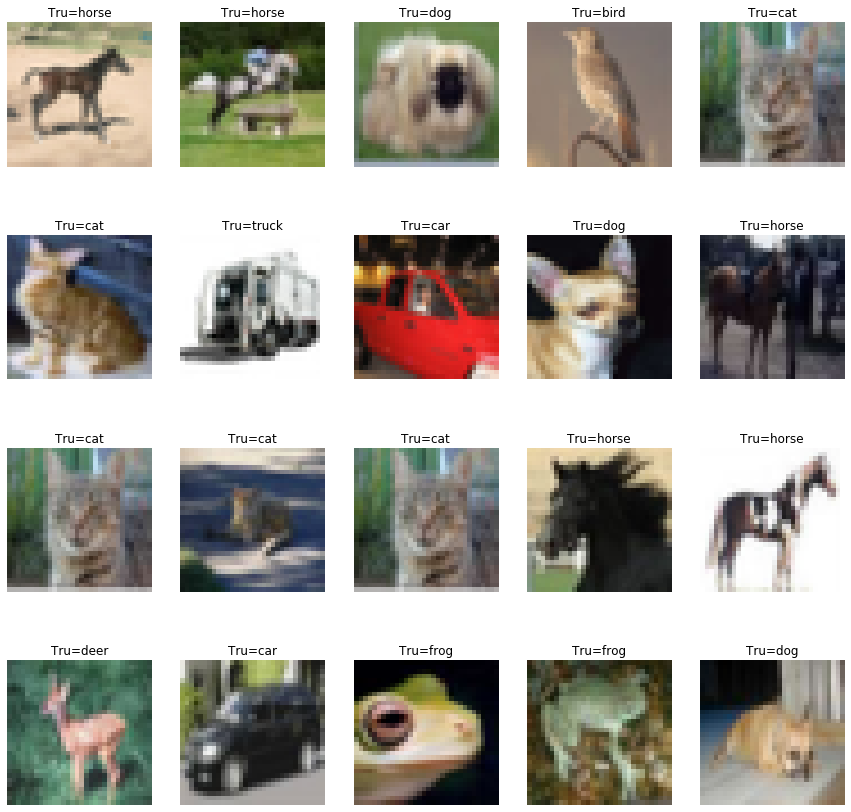

In [15]:
train_transforms = transforms.Compose([
                    transforms.RandomHorizontalFlip(),          
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                    ])
  
test_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data=DataUtility.download_CIFAR10(train_transforms,test_transforms)
DataUtility.showLoaderImages(data.train, count=20, classes=data.classes, muSigmaPair=(0.5, 0.5))

## Initialize the network and view the summary

In [16]:
from torchsummary import summary
summary(Resnet.ResNet18().to(Utility.getDevice()), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Train the network

In [20]:
net = Resnet.ResNet18().to(Utility.getDevice())
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)
builder = ModelBuilder(net, data, LossFn(nn.CrossEntropyLoss()), optimizer)
result = builder.fit(20)



Epoch: 1


Train Accuracy: 54.34%, Train Loss: 0.009835269302129745


Test Accuracy: 60.16%, Test Loss: 0.008979963138699532


Epoch: 2


Train Accuracy: 73.514%, Train Loss: 0.005872662644833326


Test Accuracy: 75.39%, Test Loss: 0.00554202264174819


Epoch: 3


Train Accuracy: 80.134%, Train Loss: 0.004441131837666035


Test Accuracy: 75.77%, Test Loss: 0.005835678894072771


Epoch: 4


Train Accuracy: 84.068%, Train Loss: 0.0035721773747354746


Test Accuracy: 79.45%, Test Loss: 0.004706626292318106


Epoch: 5


Train Accuracy: 87.148%, Train Loss: 0.0029015610925853252


Test Accuracy: 82.94%, Test Loss: 0.004045497626066208


Epoch: 6


Train Accuracy: 89.388%, Train Loss: 0.0023618813138455153


Test Accuracy: 82.37%, Test Loss: 0.00418878486379981


Epoch: 7


Train Accuracy: 91.048%, Train Loss: 0.0020186989568173885


Test Accuracy: 80.22%, Test Loss: 0.005406775511801243


Epoch: 8


Train Accuracy: 92.672%, Train Loss: 0.0016576836351305246


Test Accuracy: 82.19%, Test Loss: 0.004720993340015411


Epoch: 9


Train Accuracy: 93.864%, Train Loss: 0.0013963717501610518


Test Accuracy: 83.55%, Test Loss: 0.004344763234257698


Epoch: 10


Train Accuracy: 95.288%, Train Loss: 0.0010671173222362995


Test Accuracy: 85.14%, Test Loss: 0.004082489758729935


Epoch: 11


Train Accuracy: 95.686%, Train Loss: 0.0009712196770124137


Test Accuracy: 83.94%, Test Loss: 0.004745109006762505


Epoch: 12


Train Accuracy: 96.786%, Train Loss: 0.0007484517409466207


Test Accuracy: 83.93%, Test Loss: 0.004849141463637352


Epoch: 13


Train Accuracy: 97.32%, Train Loss: 0.0006087208166718483


Test Accuracy: 83.65%, Test Loss: 0.005534044932574034


Epoch: 14


Train Accuracy: 97.474%, Train Loss: 0.000572622346226126


Test Accuracy: 84.03%, Test Loss: 0.005241157952696085


Epoch: 15


Train Accuracy: 98.076%, Train Loss: 0.0004383513587526977


Test Accuracy: 84.03%, Test Loss: 0.005379522684961557


Epoch: 16


Train Accuracy: 98.276%, Train Loss: 0.0004013730213046074


Test Accuracy: 84.87%, Test Loss: 0.00528153358027339


Epoch: 17


Train Accuracy: 98.452%, Train Loss: 0.00033929632627405226


Test Accuracy: 85.6%, Test Loss: 0.005265609826892614


Epoch: 18


Train Accuracy: 98.864%, Train Loss: 0.00026157795218750834


Test Accuracy: 85.46%, Test Loss: 0.005111027974635363


Epoch: 19


Train Accuracy: 98.752%, Train Loss: 0.0002805553376674652


Test Accuracy: 85.72%, Test Loss: 0.005163983441889286


Epoch: 20


Train Accuracy: 98.98%, Train Loss: 0.00023131995112635195


Test Accuracy: 86.29%, Test Loss: 0.005170826800167561


## Plot metrics and loss

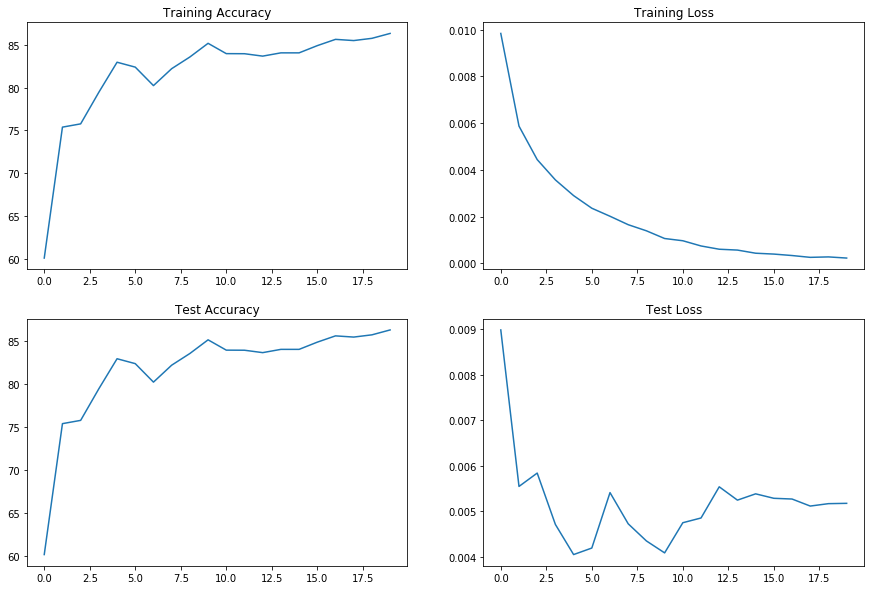

In [21]:
MetricsUtility.plotMetrics(result)

## View miss classified images

[[843   7  40   6   9   4  11   7  43  30]
 [  5 932   2   2   1   1   2   1  10  44]
 [ 34   1 832  23  42  29  25   8   2   4]
 [ 11   0  60 704  51  95  48  14  11   6]
 [  3   3  54  25 860   9  24  18   3   1]
 [  3   1  28 101  37 791  13  15   8   3]
 [  2   0  40  25   9   5 907   6   5   1]
 [  5   2  21  16  33  25   4 883   2   9]
 [ 24  12   8   2   0   0   5   1 925  23]
 [  7  32   4   8   4   0   4   2   6 933]]


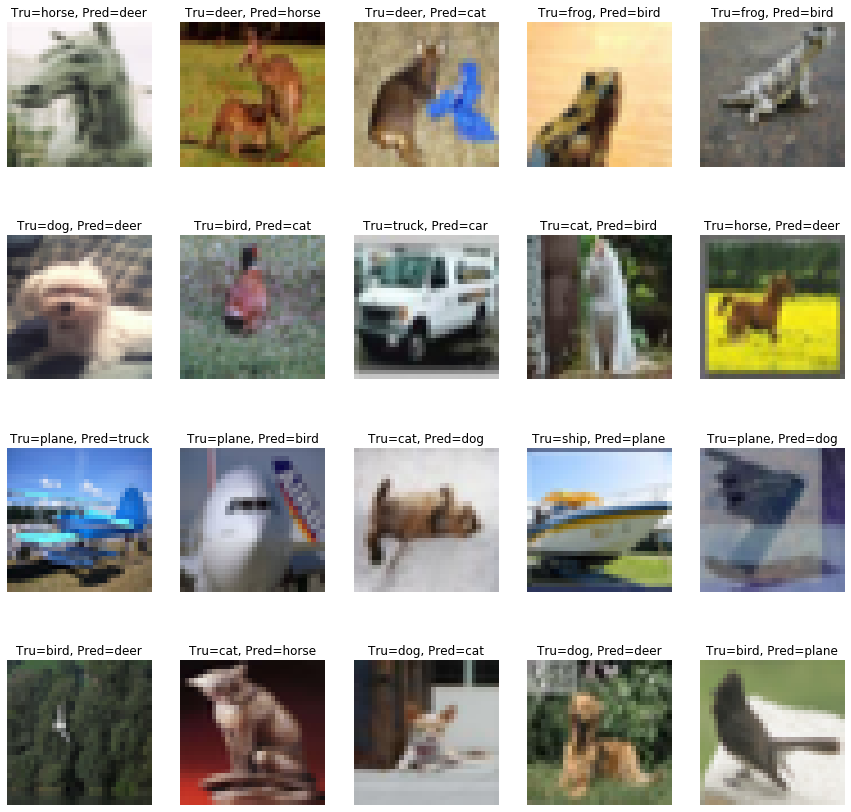

In [22]:
cpu = torch.device("cpu")
testResult = ModelTester().test(net, data.test, LossFn(F.nll_loss))
metrics = MetricsUtility.computeMetrics(testResult.data, testResult.predictions, testResult.targets)
DataUtility.showRandomImages(metrics.miss_classified_data.to(cpu), metrics.miss_classified_targets.to(cpu), metrics.miss_classified_predictions.to(cpu), data.classes, muSigmaPair=(0.5, 0.5))